In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#Modelling
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

In [3]:
df = pd.read_csv('data/StudentsPerformance.csv')

In [4]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## preparing X and Y

In [6]:
x = df.drop(['math score'],axis=1)
y = df['math score']

In [7]:
num_features = x.select_dtypes(exclude='object').columns
cat_features = x.select_dtypes(include='object').columns

from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

scaler = StandardScaler()
encoder = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
    ('standardization',scaler,num_features),
    ('onehotencoder',encoder,cat_features)
    ]
)


## train test and split

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [13]:
x_train = preprocessor.fit_transform(x_train)
x_test = preprocessor.transform(x_test)

In [14]:
x_train

array([[ 0.03079054,  0.43405338,  1.        , ...,  1.        ,
         0.        ,  1.        ],
       [ 0.9302895 ,  0.96470125,  1.        , ...,  0.        ,
         1.        ,  0.        ],
       [ 1.34544287,  1.1636942 ,  1.        , ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [-0.52274728, -1.02522827,  1.        , ...,  1.        ,
         0.        ,  1.        ],
       [-1.49143847, -1.02522827,  0.        , ...,  0.        ,
         1.        ,  0.        ],
       [ 1.48382733,  1.36268716,  1.        , ...,  1.        ,
         0.        ,  1.        ]], shape=(800, 19))

## creating an evaluate function which will give all metrics score after model training

In [15]:
def evaluate_model(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r_score = r2_score(y_true, y_pred)
    rmse = np.sqrt(mse)
    return mse,mae,rmse,r_score

In [24]:
models = {
    'Linear regression': LinearRegression(),
    'Ridge regression' : Ridge(),
    'Lasso regression' : Lasso(),
    'Decision tree regression' : DecisionTreeRegressor(),
    'Random forest regrtession' : RandomForestRegressor(),
    'Adaboost regression' : AdaBoostRegressor(),
    'Catboost regression' : CatBoostRegressor(verbose=0),
    'Xgboost regression' : XGBRegressor(),
    'SVM regression' : SVR()
}

model_list = []
r2_score_list = []

for name,model in models.items():
    model.fit(x_train,y_train)
    # prediction
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    # evaluating model score 
    model_train_mse,model_train_mae,model_train_rmse,model_train_score = evaluate_model(y_train,y_train_pred)
    model_test_mse,model_test_mae,model_test_rmse,model_test_score = evaluate_model(y_test,y_test_pred)
    model_list.append(name)
    r2_score_list.append(model_test_score)

    print('\n',name)
    print('model test performance for training set')
    print(' - mean squared error : {:.4f}'.format(model_train_mse))
    print(' - mean_absolute error : {:.4f}'.format(model_train_mae))
    print(' - root mean squared error : {:.4f}'.format(model_train_rmse))
    print(' - r2 score : {:.4f}'.format(model_train_score))

    print('- - - - - - - - - - - - - - - - - - - - - - - - - - - ')

    print('model test performance for test set')
    print(' - mean squared error : {:.4f}'.format(model_test_mse))
    print(' - mean_absolute error : {:.4f}'.format(model_test_mae))
    print(' - root mean squared error : {:.4f}'.format(model_test_rmse))
    print(' - r2 score : {:.4f}'.format(model_test_score))
    print('= = = = = = = = = = = = = = = = = = = = = = = = = = = =')






 Linear regression
model test performance for training set
 - mean squared error : 28.3349
 - mean_absolute error : 4.2667
 - root mean squared error : 5.3231
 - r2 score : 0.8743
- - - - - - - - - - - - - - - - - - - - - - - - - - - 
model test performance for test set
 - mean squared error : 29.0952
 - mean_absolute error : 4.2148
 - root mean squared error : 5.3940
 - r2 score : 0.8804
= = = = = = = = = = = = = = = = = = = = = = = = = = = =

 Ridge regression
model test performance for training set
 - mean squared error : 28.3377
 - mean_absolute error : 4.2650
 - root mean squared error : 5.3233
 - r2 score : 0.8743
- - - - - - - - - - - - - - - - - - - - - - - - - - - 
model test performance for test set
 - mean squared error : 29.0566
 - mean_absolute error : 4.2111
 - root mean squared error : 5.3904
 - r2 score : 0.8806
= = = = = = = = = = = = = = = = = = = = = = = = = = = =

 Lasso regression
model test performance for training set
 - mean squared error : 43.4611
 - mean_abso

In [26]:
pd.DataFrame(list(zip(model_list,r2_score_list)),columns=['Model name','r2_score']).sort_values(by=['r2_score'],ascending=False)

,Model name,r2_score
1,Ridge regression,0.880592
0,Linear regression,0.880433
4,Random forest regrtession,0.852107
6,Catboost regression,0.851831
5,Adaboost regression,0.847150
2,Lasso regression,0.825447
7,Xgboost regression,0.821221
3,Decision tree regression,0.739396
8,SVM regression,0.729105


### linear regression is working well

In [27]:
regression = LinearRegression()
regression.fit(x_train,y_train)
y_pred = regression.predict(x_test)

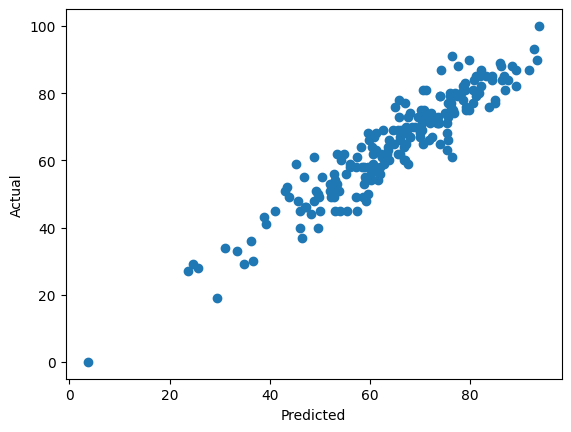

In [28]:
plt.scatter(y_pred,y_test)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

<Axes: xlabel='math score'>

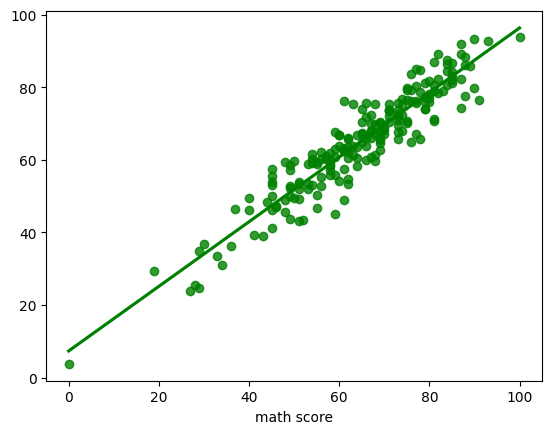

In [30]:
sns.regplot(x=y_test,y=y_pred,ci=None,color='g')

### Difference between predicted and actual value

In [31]:
pd.DataFrame({'Actual':y_test,'Predicted':y_pred,'Difference':y_test - y_pred})

,Actual,Predicted,Difference
521,91,76.387970,14.612030
737,53,58.885970,-5.885970
740,80,76.990265,3.009735
660,74,76.851804,-2.851804
411,84,87.627378,-3.627378
...,...,...,...
408,52,43.409149,8.590851
332,62,62.152214,-0.152214
208,74,67.888395,6.111605
613,65,67.022287,-2.022287
